In [47]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import mysql_conn as mc

sns.set_style("white")

# Linear Regression

In [5]:
x = np.array([7, 20, 13, 59, 40, 51, 37])
y = np.array([7, 6, 8, 1, 3, 2, 3])

Mean

In [6]:
x.mean()

32.42857142857143

In [7]:
y.mean()

4.285714285714286

Variance

In [9]:
# add degrees of freedom for unbiased estimator
ddof = 1

In [10]:
x.var(ddof=ddof)

384.61904761904754

In [11]:
y.var(ddof=ddof)

7.238095238095238

Standard Deviation

In [13]:
np.sqrt(x.var(ddof=ddof))

19.611706902231827

In [14]:
x.std(ddof=ddof)

19.611706902231827

In [15]:
y.std(ddof=ddof)

2.690370836538197

Covariance

In [16]:
np.cov(x, y, ddof=ddof)

array([[384.61904762, -51.30952381],
       [-51.30952381,   7.23809524]])

Returns a variance-covariance matrix

In [19]:
np.cov(x, y, ddof=ddof)[1,0]

-51.3095238095238

Correlation coefficient (Pearson)

In [20]:
np.cov(x, y, ddof=ddof)[1,0] / np.sqrt(x.var(ddof=ddof) * y.var(ddof=ddof))

-0.9724570819188173

In [24]:
np.corrcoef(x, y)[1,0]

-0.9724570819188175

Regression coefficient

1. manually

In [26]:
beta_1 = np.cov(x, y, ddof=ddof)[1,0] / x.var(ddof=ddof)
beta_1

-0.13340349139532007

In [29]:
beta_0 = y.mean() - beta_1 * x.mean()
beta_0

8.611798935248236

2. Using statsmodels

In [31]:
df = pd.DataFrame({"y": y, "x": x})
df

,y,x
0,7,7
1,6,20
2,8,13
3,1,59
4,3,40
5,2,51
6,3,37


Add constant manually

In [33]:
df = sm.add_constant(df)

**Run OLS to estimate the regression coefficients**

In [35]:
lin_reg = sm.OLS(df["y"],
                 df[["const", "x"]])

In [37]:
result = lin_reg.fit()

In [38]:
result.summary()

/Users/at/miniconda3/envs/boogie_woogie/lib/python3.8/site-packages/statsmodels/stats/stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     87.03
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           0.000238
Time:                        15:25:13   Log-Likelihood:                -6.1262
No. Observations:                   7   AIC:                             16.25
Df Residuals:                       5   BIC:                             16.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6118      0.531     16.204      0.000       7.246       9.978
x             -0.1334      0.014     -9.329      0.000      -0.170      -0.097
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.559
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.457
Skew:                           0.582   Prob(JB):                        0.796
Kurtosis:                       2.539   Cond. No.                         76.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
result.predict(df[["const", "x"]])

0    7.677974
1    5.943729
2    6.877554
3    0.740993
4    3.275659
5    1.808221
6    3.675870
dtype: float64

In [41]:
df = df.assign(y_hat=result.predict(df[["const", "x"]]))

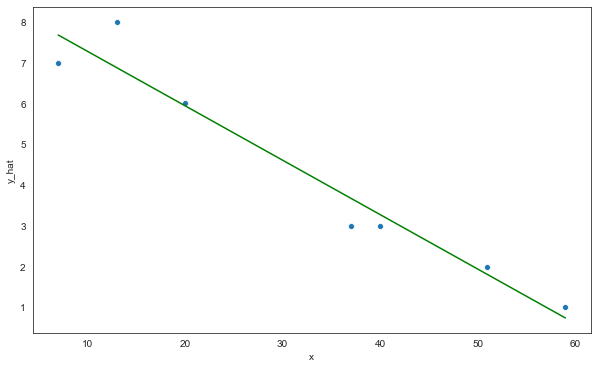

In [46]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data=df,
                x="x",
                y="y",
                ax=ax);

sns.lineplot(data=df,
             x="x",
             y="y_hat",
             ax=ax,
             color="g");

Interpretation:

With every increase of price (x) by 1 unit, our ratings (y) tend to decrease by 0.13

# Olist - Linear Regression

In [48]:
conn = mc.connect()

Please provide your password········


In [49]:
review_score_query = """
SELECT
    o.order_id,
    dor.review_score,
    DATEDIFF(DATE(o.order_estimated_delivery_date), DATE(o.order_purchase_timestamp)) AS estimated_delivery_days,
    DATEDIFF(DATE(o.order_delivered_customer_date), DATE(o.order_purchase_timestamp)) AS actual_delivery_days,
    DATEDIFF(DATE(o.order_estimated_delivery_date), DATE(o.order_purchase_timestamp)) -
        DATEDIFF(DATE(o.order_delivered_customer_date), DATE(o.order_purchase_timestamp)) AS delivery_diff,
    oid.total_price,
    oid.shipping_costs,
    oid.order_size,
    oid.has_product_photo,
    oid.has_product_decription
FROM orders o
    JOIN temp_dedup_order_reviews dor
    ON o.order_id = dor.order_id
    JOIN temp_order_item_details oid
    ON o.order_id = oid.order_id
WHERE o.order_status = 'delivered';
"""

review_score = pd.read_sql(review_score_query, conn)

In [50]:
review_score.head()

,order_id,review_score,estimated_delivery_days,actual_delivery_days,delivery_diff,total_price,shipping_costs,order_size,has_product_photo,has_product_decription
0,e481f51cbdc54678b7cc49136f2d6af7,4,16,8.0,8.0,29.990000,8.720000,1,1.0,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,4,20,14.0,6.0,118.699997,22.760000,1,1.0,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,5,27,9.0,18.0,159.899994,19.219999,1,1.0,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,5,27,14.0,13.0,45.000000,27.200001,1,1.0,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,5,13,3.0,10.0,19.900000,8.720000,1,1.0,1.0


## Model 1: review_score as a function of delivery_diff

$review\_score = const + delivery\_diff * coeff$

In [52]:
review_score = sm.add_constant(review_score)

In [55]:
# OLS errored due to infs or nans. Remove them
review_score = (review_score
                .replace([np.inf, -np.inf], np.nan)
                .dropna())

In [56]:
y = review_score["review_score"]
X = review_score[["const", "delivery_diff"]]

rev_lr = sm.OLS(y, X).fit()

In [57]:
rev_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     7554.
Date:                Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:45:26   Log-Likelihood:            -1.5817e+05
No. Observations:               96470   AIC:                         3.163e+05
Df Residuals:                   96468   BIC:                         3.164e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.7377      0.006    606.021      0.000       3.726       3.750
delivery_diff     0.0343      0.000     86.916      0.000       0.033       0.035
==============================================================================
Omnibus:                    19324.613   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33264.195
Skew:                          -1.349   Prob(JB):                         0.00
Kurtosis:                       3.998   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- With every additional day that we overestimate the delivery, our review_score tends to increase by 0.034.
- With every 10 days that we overestimate the delivery, customers tend to give us review_scores that are higher by 0.34 points. 

# Model 2: review_score as a function of multiple regressors

In [58]:
y2 = review_score["review_score"]
X2 = review_score[["const", "delivery_diff", "shipping_costs"]]

rev_lr2 = sm.OLS(y2, X2).fit()

In [59]:
rev_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     4394.
Date:                Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:52:53   Log-Likelihood:            -1.5760e+05
No. Observations:               96470   AIC:                         3.152e+05
Df Residuals:                   96467   BIC:                         3.152e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.8728      0.007    529.288      0.000       3.858       3.887
delivery_diff      0.0349      0.000     88.992      0.000       0.034       0.036
shipping_costs    -0.0063      0.000    -33.831      0.000      -0.007      -0.006
==============================================================================
Omnibus:                    18892.135   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32351.720
Skew:                          -1.312   Prob(JB):                         0.00
Kurtosis:                       4.078   Cond. No.                         60.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. delivery_diff:
    - With every additional day that we overstimate our delivery, customers tend to rate us better by 0.035, *holding everything else constant (cp := ceteris paribus)*
    
2. shipping_costs:
    - By decreasing the shipping costs by 1 Reaie, we expect the review score to increase by 0.006, *holding everything else constant*

## Model 3

In [63]:
review_score = review_score.assign(photo_ratio=review_score["has_product_photo"] / review_score["order_size"])

In [64]:
X3 = review_score[["const", "delivery_diff", "shipping_costs", "photo_ratio"]]
y3 = review_score["review_score"]

rev_lr3 = sm.OLS(y3, X3).fit()

In [65]:
rev_lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     2934.
Date:                Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:01:07   Log-Likelihood:            -1.5759e+05
No. Observations:               96470   AIC:                         3.152e+05
Df Residuals:                   96466   BIC:                         3.152e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.7489      0.034    109.451      0.000       3.682       3.816
delivery_diff      0.0349      0.000     88.977      0.000       0.034       0.036
shipping_costs    -0.0063      0.000    -33.891      0.000      -0.007      -0.006
photo_ratio        0.1260      0.034      3.703      0.000       0.059       0.193
==============================================================================
Omnibus:                    18879.174   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32318.595
Skew:                          -1.312   Prob(JB):                         0.00
Kurtosis:                       4.077   Cond. No.                         395.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""